# Statistiques descriptives 

## Modules utiles

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import scale 

## Import des données :

In [6]:
enedis_IDF=pd.read_csv("Données/data_conso_moyenne/data_conso_IDF.csv")
enedis_PACA=pd.read_csv("Données/data_conso_moyenne/data_conso_PACA.csv")
enedis_HDF=pd.read_csv("Données/data_conso_moyenne/data_conso_HDF.csv")

enedis_france=pd.read_csv("Données/data_conso_moyenne/data_conso_france.csv")


## 1. Dynamique annuelle (consommation électrique et météo)

#### Statistiques sur les températures

* Variation de la température par jour par région 
  

In [75]:
def temp_day_region(df,region):
    res=enedis_filtered[enedis_filtered["region_x"]==region].groupby("date")["tmoy"].mean()
    plt.plot(res, label= region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.title("Variation de la température par jour pour "+region,size=18)
    
    

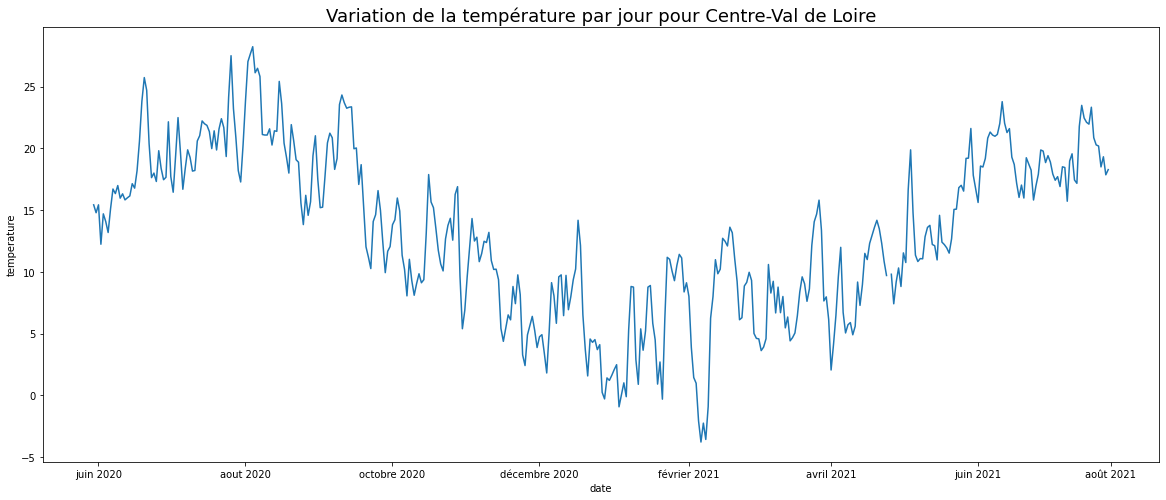

In [42]:
plt.figure(figsize=(20, 8))
temp_day_region(enedis_filtered,'Centre-Val de Loire')

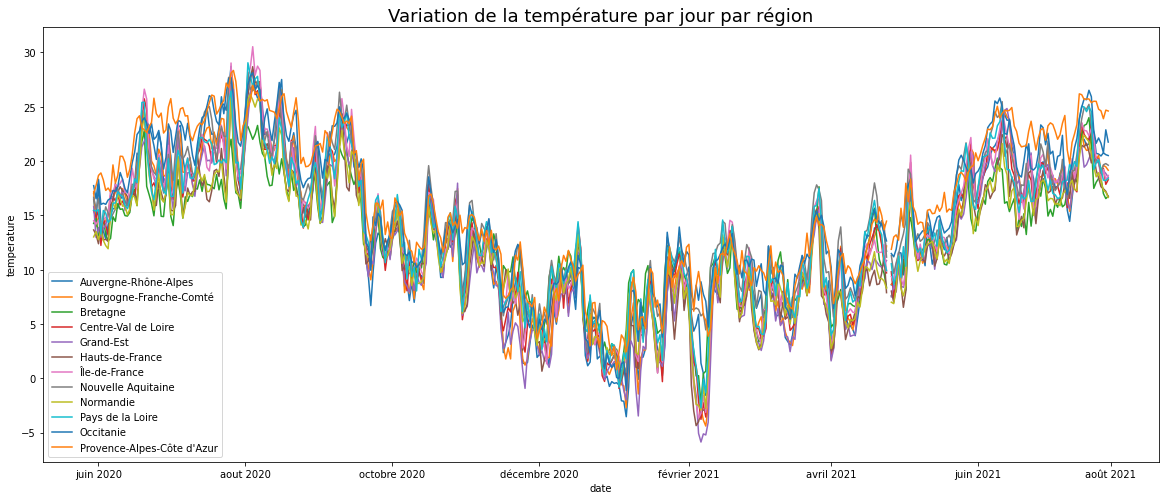

In [43]:
regions=list(enedis_filtered["region_x"].unique())

def temp_day_regions(df,regions):
    plt.figure(figsize=(20, 8))
    for region in regions:
        temp_day_region(enedis_filtered,region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.legend()
    plt.title("Variation de la température par jour par région",size=18)
    plt.show()

temp_day_regions(enedis_filtered,regions)

### Statistiques sur la consommation :

* Variation de la consommation électrique sur l'année pour la France 

In [20]:
def conso_day_france(df):

    

    plt.figure(figsize=(20, 8))
    plt.grid(True)
    plt.plot(df.date,df.conso_totale_moyenne)
    plt.plot(df.date,df.conso_totale_moyenne.rolling(5).mean()) # moyenne glissante sur 3 jours 

    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('consommation totale moyenne en Wh par jour')
    plt.title("Variation de la consommation électrique par ménage sur 1 an pour la France ",size=18)
    plt.show

    

En moyenne, un ménage français consomme donc 12,5 KWh par jour (source : RTE). https://www.lenergietoutcompris.fr/actualites-conseils/quelle-est-la-consommation-delectricite-moyenne-par-jour-en-france#:~:text=En%20moyenne%2C%20un%20m%C3%A9nage%20fran%C3%A7ais,montre%20le%20tableau%20ci%2Ddessous.   

Avec nos données, nous trouvons une conso moyenne par ménage de 14kWh.

A l'année, la consommation total est de 174 TWh, ce qui correspond bien à ce que nous trouvons sur internet.

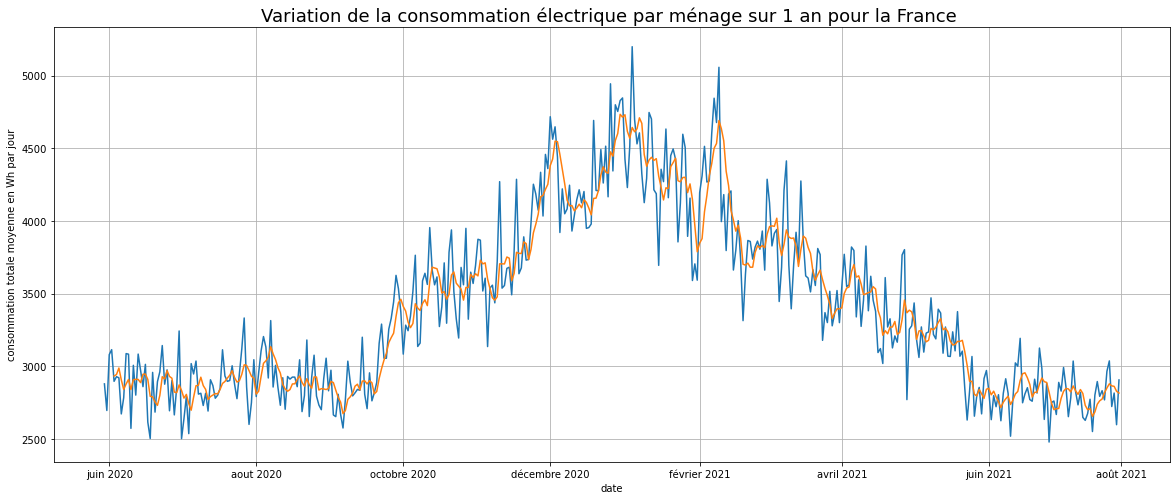

In [21]:
conso_day_france(enedis_france)

* Variation de la consommation électrique sur l'année par région

In [30]:
def conso_day_reg(df,region):
    
    print("moyenne de la consommation pour la région {} : {}".format(region,df.conso_totale_moyenne.mean()))
    plt.figure(figsize=(20, 4))
    plt.grid(True)

    plt.plot(df.date,df.conso_totale_moyenne)
    plt.plot(df.date,df.conso_totale_moyenne.rolling(5).mean()) # moyenne glissante sur 3 jours 

    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
    plt.xlabel('date')
    plt.ylabel('consommation totale moyenne en Wh par jour')
    plt.title("Variation de la consommation électrique moyenne par contrat sur 1 an pour "+region,size=18)
    plt.show
    

moyenne de la consommation pour la région Provence-Alpes-Côte d'Azur : 3351.7668581609378
moyenne de la consommation pour la région Île-de-France : 3312.706376250415
moyenne de la consommation pour la région Hauts-de-France : 3643.244162313228


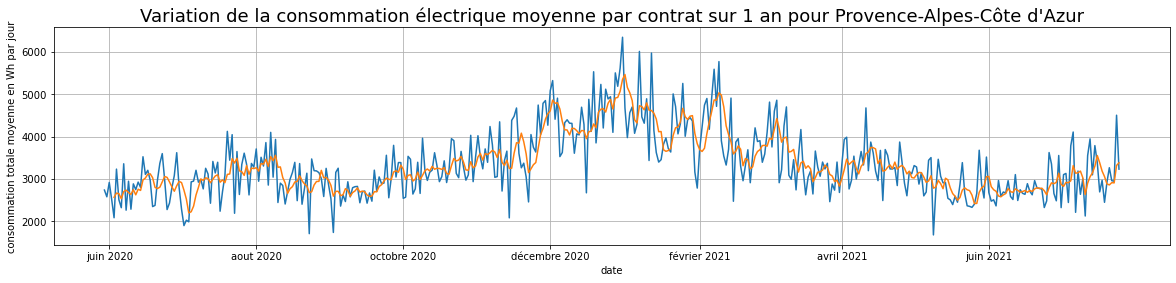

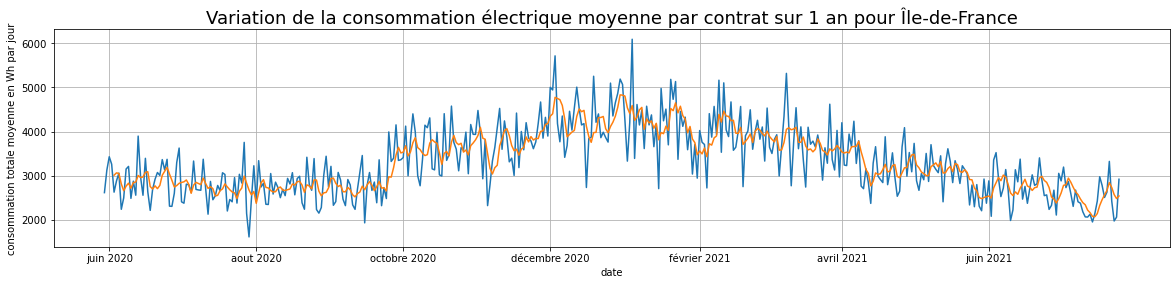

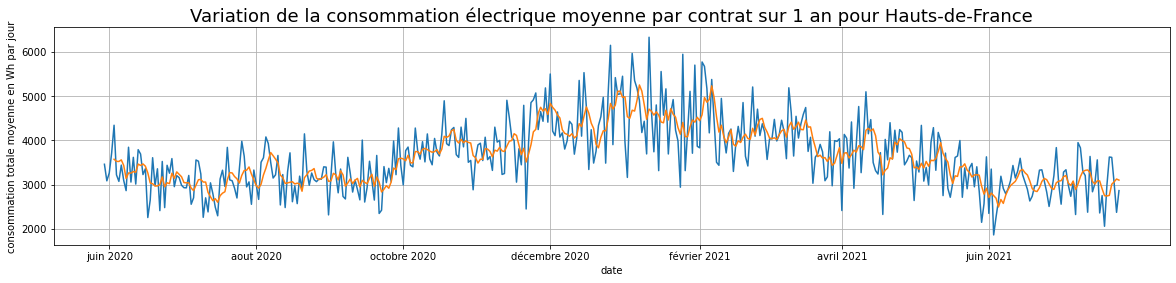

In [31]:
conso_day_reg(enedis_PACA,"Provence-Alpes-Côte d'Azur")
conso_day_reg(enedis_IDF,'Île-de-France')
conso_day_reg(enedis_HDF,'Hauts-de-France')

* Corrélation température/consommation électrique, par région 

In [36]:
def corr_total_energie_temperature(df,region):
    plt.figure(figsize=(20, 8))
    plt.ylabel("total moyen d'énergie soutirée par jour (Wh)")
    plt.xlabel('temperature')
    plt.grid(True)
    plt.title("Corrélation entre température moyenne et totale moyen d'énergie moyenne soutirée par ménage et par jour pour "+region,size=18)

    X1=df["tmoy"] # moyenne des températures par jour
    X2=df["conso_totale_moyenne"]

    plt.plot(X1,X2,"oc")

    plt.show()
    correlation=X1.corr(X2)
    print("La corrélation est de " +str(correlation))
    

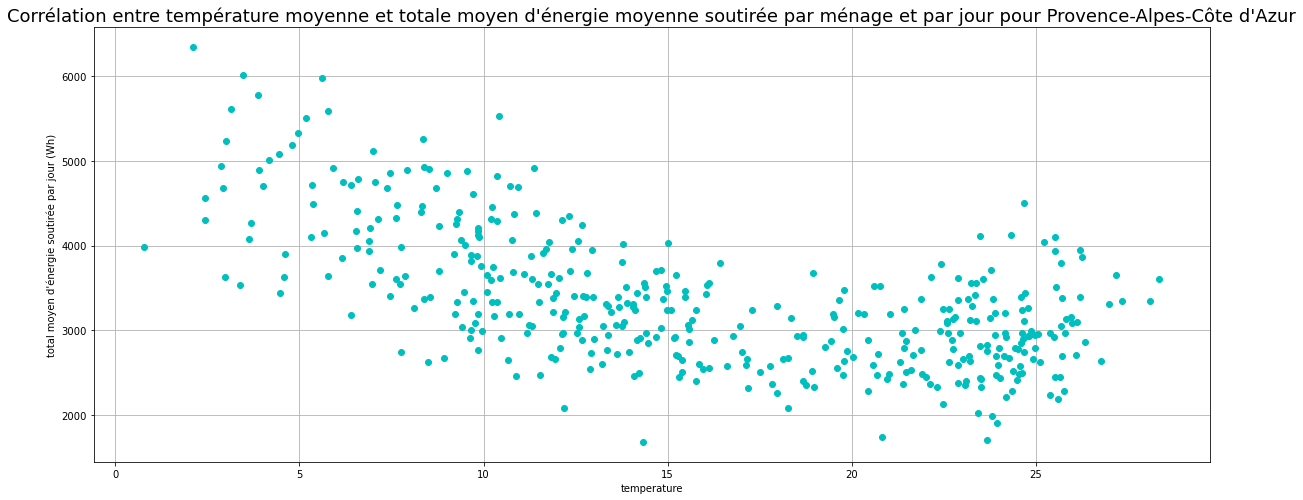

La corrélation est de -0.6113066646226325


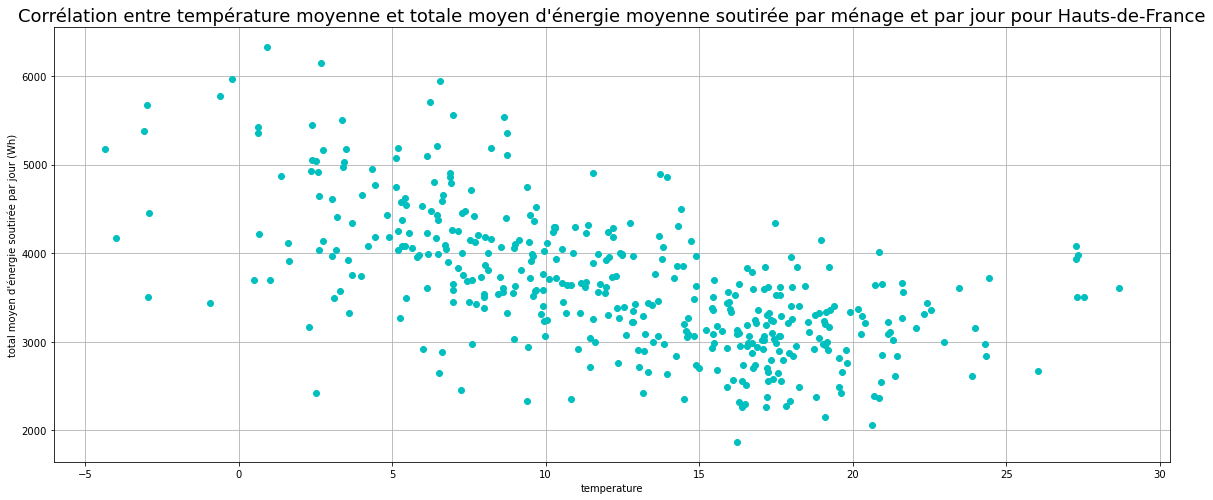

La corrélation est de -0.6168753926470565


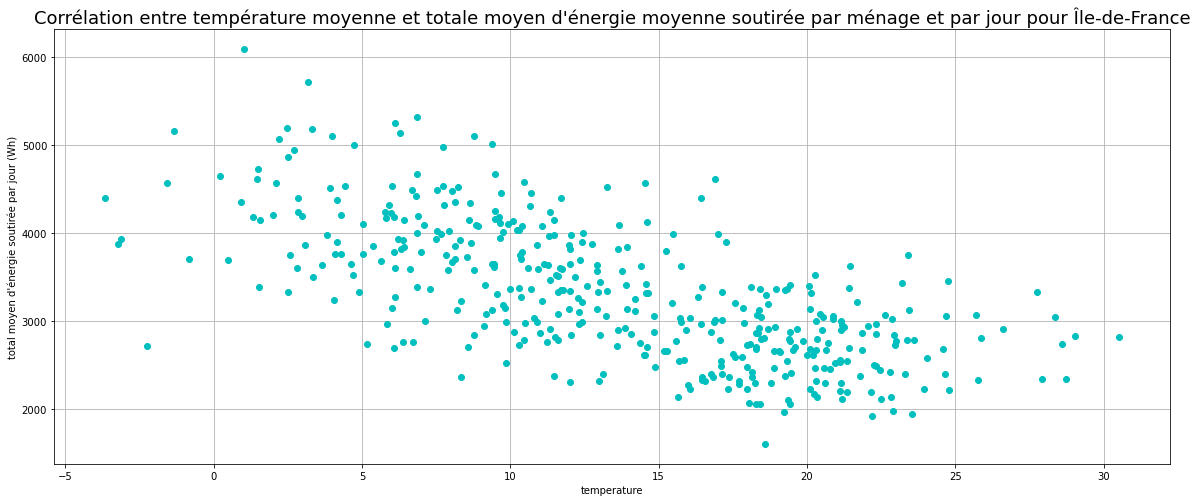

La corrélation est de -0.6791109547175954


In [37]:
# Les points correspondent à un jour : donc il y a plus de 365 points
#pour PACA, plus d'énergie soutirée en été à partir de 25 degrés que pour d'autres régions (effet clim) (600kW)

corr_total_energie_temperature(enedis_PACA,"Provence-Alpes-Côte d'Azur")
corr_total_energie_temperature(enedis_HDF,"Hauts-de-France")
corr_total_energie_temperature(enedis_IDF,"Île-de-France")


## 2. Dynamique saisonnière 

In [41]:
enedis_filtered=pd.read_csv("Données/enedis_filtered.csv",sep=",")

In [49]:
enedis_filtered["mois"]=enedis_filtered['horodate'].apply(lambda x : x[5:7])

In [51]:
ete=enedis_filtered[(enedis_filtered["mois"]=="06")|(enedis_filtered["mois"]=="07")|(enedis_filtered["mois"]=="08")]

automne=enedis_filtered[(enedis_filtered["mois"]=="09")|(enedis_filtered["mois"]=="10")|(enedis_filtered["mois"]=="11")]

hiver=enedis_filtered[(enedis_filtered["mois"]=="12")|(enedis_filtered["mois"]=="01")|(enedis_filtered["mois"]=="02")]

printemps=enedis_filtered[(enedis_filtered["mois"]=="03")|(enedis_filtered["mois"]=="04")|(enedis_filtered["mois"]=="05")]

## Molaire conso totale moyenne d'un jour de la saison par contrat : 

In [60]:
conso_saison_region=ete[ete["region_x"]=="Normandie"]
conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])

<ipython-input-60-b2b492a02c14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])


In [58]:
conso_saison_region.nb_points_soutirage.mean()

606703.8059910415

In [61]:
total_conso_saison_region=conso_saison_region.groupby(["date","heure"])["total_energie_soutiree_wh"].sum().reset_index()

In [62]:
total_conso_saison_region

,date,heure,total_energie_soutiree_wh
0,2020-06-04,00:00,45944695.0
1,2020-06-04,00:30,44242515.0
2,2020-06-04,01:00,43606719.0
3,2020-06-04,02:00,42863585.0
4,2020-06-04,03:30,44893936.0
...,...,...,...
3567,2021-07-30,20:00,80492265.0
3568,2021-07-30,21:00,69325371.0
3569,2021-07-30,21:30,63209135.0
3570,2021-07-30,22:00,58043444.0


In [69]:
# molaire conso moyenne par heure pour chaque jour de la saison
def molaire_saison(data_saison,region,saison,color):

    conso_saison_region=data_saison[data_saison["region_x"]==region]

    conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])

    nb_contrat=conso_saison_region.nb_points_soutirage.mean()

    total_conso_saison_region=conso_saison_region.groupby(["date","heure"])["total_energie_soutiree_wh"].sum().reset_index() # pour chaque jour, on calcule la conso totale pour chaque heure
    
    moyenne_conso_saison_region=total_conso_saison_region.groupby("heure")["total_energie_soutiree_wh"].mean() # on fait une moyenne (temporelle) du profil de conso totale sur la saison

    res_conso_moyenne=moyenne_conso_saison_region/nb_contrat # conso moyenne soutirée par contrat pour chaque 30min

    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    plt.plot(res_conso_moyenne,color,label=saison)
    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"]
    plt.xticks(t2,["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation d'énergie")
    plt.grid(True)
    plt.title('Molaire pour la saison '+saison+", région "+region,size=25)
   


def molaire_toute_saison(region,type_conso):
    plt.figure(figsize=(20, 8))
    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    

    if type_conso=="toutes conso":
        molaire_saison(ete,region,"été","orangered")
        molaire_saison(automne,region,"automne","brown")
        molaire_saison(hiver,region,"hiver","c")
        molaire_saison(printemps,region,"printemps","green")


    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:30"]
    plt.xticks(t2,["00:00","04:00","8:00","12:00","15:00","18:00","21:00","23:30"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation d'énergie d'un contrat (Wh)")
    plt.legend()
    plt.title("Consommation moyenne d'électricité d'un contrat par saison pour la région "+region,size=25)
   
    plt.show()
   

<ipython-input-69-6427aca60f69>:31: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-69-6427aca60f69>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-69-6427aca60f69>:17: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


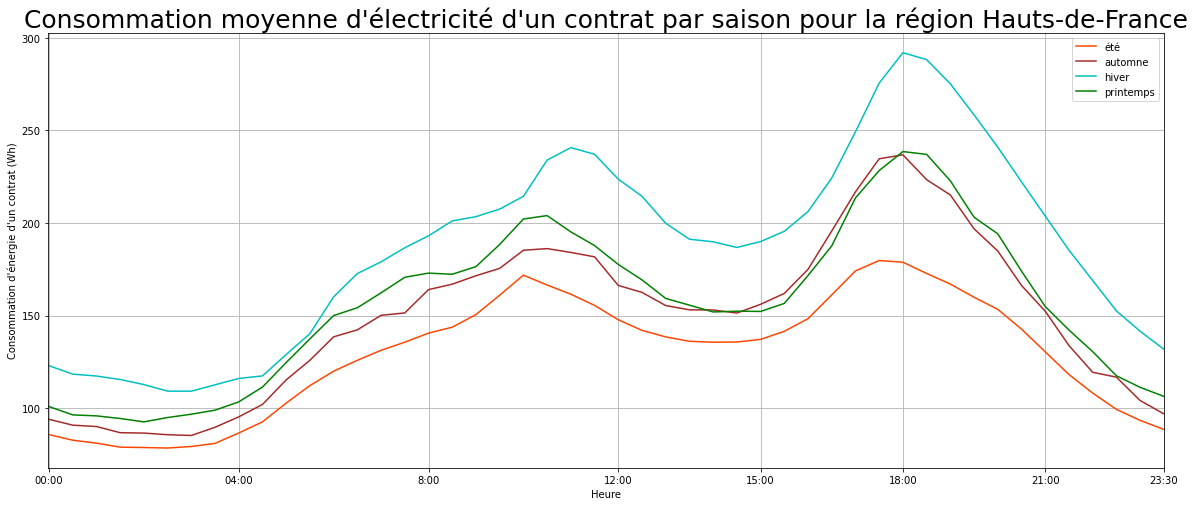

In [71]:
molaire_toute_saison("Hauts-de-France","toutes conso")

<ipython-input-69-6427aca60f69>:31: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-69-6427aca60f69>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-69-6427aca60f69>:17: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


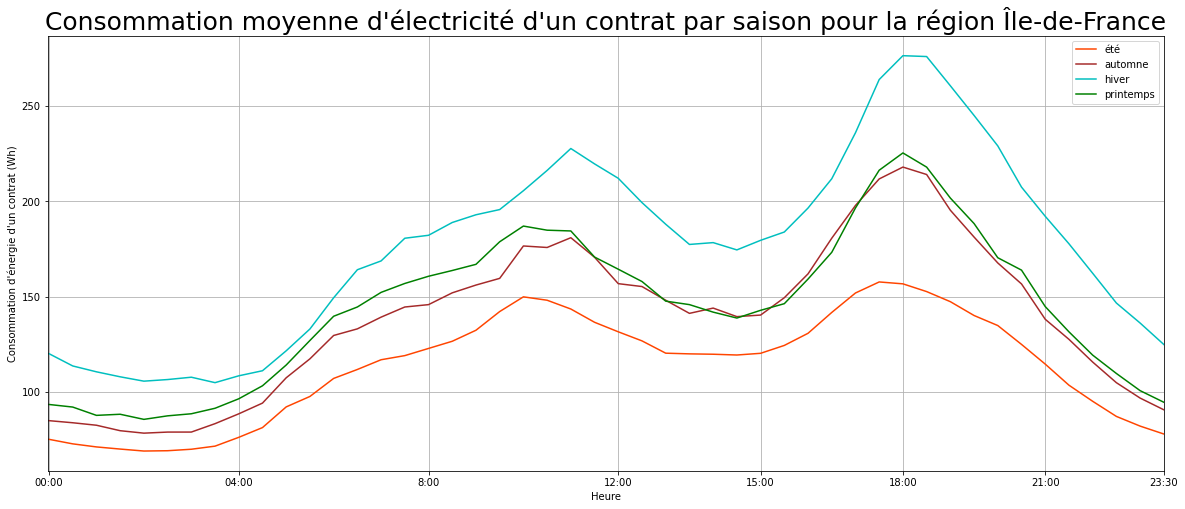

In [72]:
molaire_toute_saison("Île-de-France","toutes conso")

<ipython-input-69-6427aca60f69>:31: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
<ipython-input-69-6427aca60f69>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
<ipython-input-69-6427aca60f69>:17: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


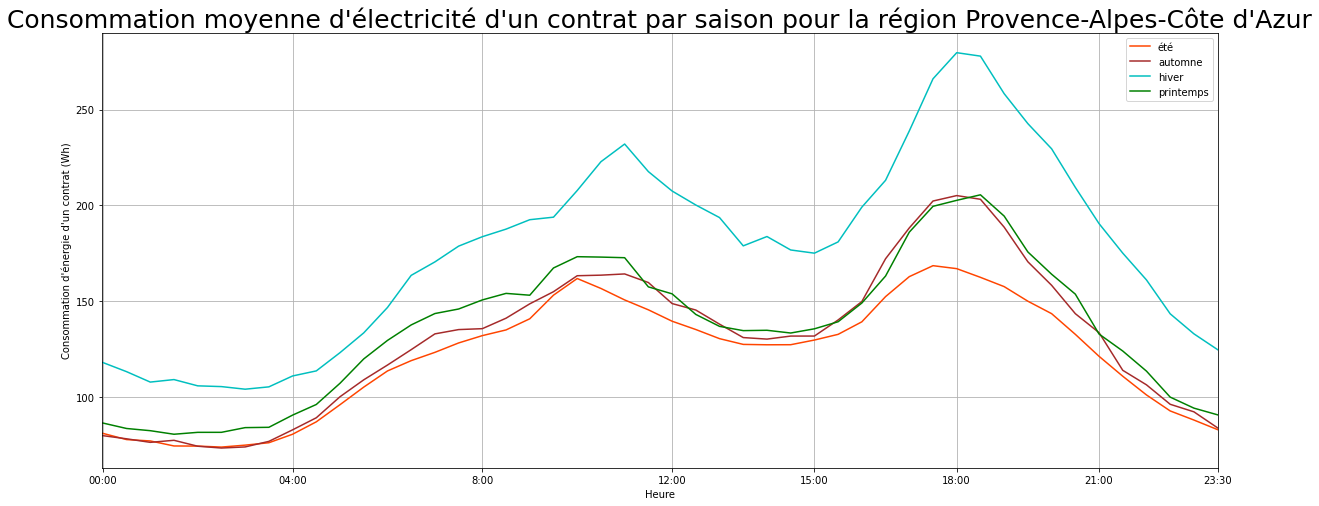

In [73]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","toutes conso")